# Chapter 5: Resampling method

เป็นวิธีการที่เกี่ยวกับการ fit model ซ้ำๆเพื่อให้ได้ข้อมูลบางอย่างที่เป็นประโยชน์เกี่ยวกับประสิทธิภาพของ model เนื่องจากการที่เกิดการ fit model ซ้ำๆทำให้วิธีการนี้มี computational cost ที่สูงเมื่อจำนวนของ sample เยอะๆ โดยจะมีวิธีการ resampling อยู่ 2 แบบ คือ cross-validation และ boostrap 

* กระบวนการการวัด model performance เรียกว่า model assessment
* กระบวนการการเลือก complexity (flexibility) ของ model เรียกว่า model selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ISLR_data/Auto.csv')
df.drop('name',axis=1,inplace=True)
df = df.replace('?', np.nan)
df =df.dropna()
df['horsepower'] = df['horsepower'].astype(float)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#Cross-Validation
* Validation set / hold out
* Leave-one-out cross validation (LOOCV)
* k-fold cross validation

## Validation set



* วิธีการคือ แบ่ง data เป็น 2 ชุด อย่าง randomly คือ training set และ validation set หลังจากนั้นนำ model ไป fit กับ training set และนำไป evaluate บน validation set เพื่อให้ได้ MSE ออกมา

* จากตัวอย่างด้านล่างทำการ randomly data ต่างกันทั้งหมด 10 แบบ แล้วนำไป fit model และหา MSE บน validation set จะพบว่าค่า MSE ที่ได้มีค่าต่างกัน ซึ่งจากทั้ง 10 กราฟชี้ให้เห็นว่า degree 2 ให้ค่า test MSE ต่ำที่สุดและไม่มีประโยชน์ที่จะเพิ่มค่า degree ของ polynomial

* จะพบว่า hold out เป็นวิธีที่ง่ายและ computational cost ไม่เยอะแต่จะมีข้อเสีย 2 อย่างคือ  
  1.   validation error มีค่าแตกต่างกันในแต่ละครั้งที่ fit model เนื่องจาก data ที่ใช้ในการ train ในแต่ละรอบไม่เหมือนกัน
  2.   validation error มักจะ overestimate (มีค่าสูงเกินจริง) กับค่า test error สำหรับการ fit ข้อมูลบน dataset ทั้งหมด



Text(0, 0.5, 'Mean Squared Error')

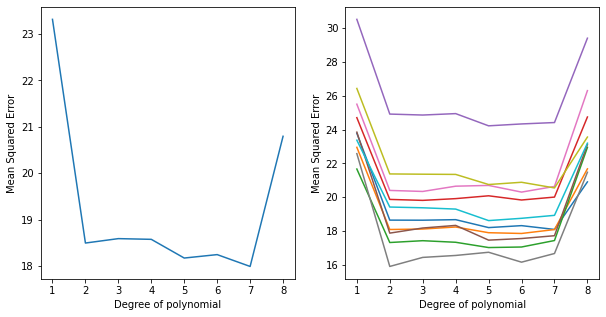

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
MSEs =[]
X_train, X_test, y_train, y_test = train_test_split(df[['horsepower']], df[['mpg']], test_size=0.45, random_state=0)
for i in range(1,9):
  polynomial_features= PolynomialFeatures(degree=i)
  xp = polynomial_features.fit_transform(X_train)
  model = sm.OLS(y_train, xp)
  results = model.fit()
  xp_test = polynomial_features.fit_transform(X_test)
  y_pred = results.predict(xp_test)
  MSEs.append(mean_squared_error(y_test, y_pred))
n = np.arange(1,i+1)
plt.subplot(1,2,1)
plt.plot(n,MSEs)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')
plt.subplot(1,2,2)
for j in range(1,11):
  MSEs =[]
  X_train, X_test, y_train, y_test = train_test_split(df[['horsepower']], df['mpg'], test_size=0.45, random_state=j)
  for i in range(1,9):
    polynomial_features= PolynomialFeatures(degree=i)
    xp = polynomial_features.fit_transform(X_train)
    model = sm.OLS(y_train, xp)
    results = model.fit()
    xp_test = polynomial_features.fit_transform(X_test)
    y_pred = results.predict(xp_test)
    MSEs.append(mean_squared_error(y_test, y_pred))
  n = np.arange(1,i+1)
  plt.plot(n,MSEs)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')

## Leave-one-out cross validation (LOOCV)

คือการแบ่งข้อมูล validation set จำนวน 1 sample และ training set จำนวน N-1 sample โดย N คือจำนวนข้อมูลทั้งหมด และหาค่า MSE ของ validation set แค่ 1 ตัว ทำซ้ำทั้งหมด N รอบ ดังนั้นจะได้ค่า Mean squared error ทั้งหมด N ตัว หลังจากนั้นจะหา cross validation error โดย 
$$ CV_{(n)} = \frac{1}{n}\sum_{i=1}^{n}MSE_i$$

ข้อดีที่เห็นได้ชัดของวิธีการนี้คือมี bias ลดลงเมื่อเทียบกับ hold out เนื่องจากจำนวนข้อมูลที่มาใช้ train มีจำนวนทั้งหมด N-1 ตัว ซึ่งมากกว่า hold out มาก ดังนั้นวิธีการนี้มักจะไม่ overestimate test error และข้อดีอีกอย่างหนึ่งคือการทำซ้ำของวิธีการนี้ก็ยังจะให้ค่า validation error เหมือนเดิม เนื่องจากแบ่งชุดข้อมูลเป็น N-1, 1 ทั้งหมดสองชุดและทำทั้งหมด N รอบ การ random ไม่ได้ทำให้เกิดการเปลี่ยนแปลงอะไร แต่ข้อเสียของวิธีนี้ก็คือ computational cost ที่สูงกว่า hold out มาก

Text(0.5, 1.0, 'LOOCV')

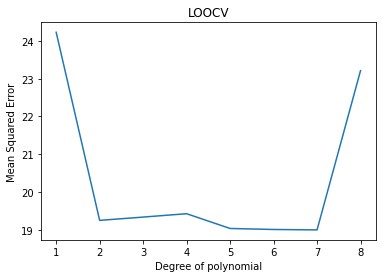

In [8]:
X = df[['horsepower']].to_numpy()
y = df[['mpg']].to_numpy()
loo = LeaveOneOut()
MSEs = []
for i in range(1,9):
  mse = 0
  for train_index, test_index in loo.split(X):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]  
    polynomial_features= PolynomialFeatures(degree=i)
    xp = polynomial_features.fit_transform(X_train)
    model = sm.OLS(y_train, xp)
    results = model.fit()
    xp_test = polynomial_features.fit_transform(X_test)
    y_pred = results.predict(xp_test)
    mse += mean_squared_error(y_test, y_pred)
  MSEs.append(mse/len(y))
n = np.arange(1,i+1)
plt.plot(n, MSEs)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')
plt.title('LOOCV')

## k-fold cross validation

วิธีการนี้จะแบ่ง dataset เป็น k ชุดอย่าง randomly ก่อนหลังจากนั้น จะแบ่ง training data ออกเป็น k-1 ชุดและ validation data 1 ชุด หลังจากนั้นจะทำซ้ำทั้งหมด k รอบ ดังนั้นเราจะได้ Mean Squared Error ทั้งหมด k ค่า หลังจากนั้นจะหาค่า cross validation error โดย
$$ CV_{(k)} = \frac{1}{k}\sum_{i=1}^kMSE_i $$

จึงเห็นได้อย่างง่ายว่า LOOCV เป็น special case ของ k-fold ในกรณีที่ k = N และข้อได้เปรียที่เหนือกว่า LOOCV คือ computational cost ที่มีค่าน้อยกว่ามากซึ่ง k-fold จะทำการ fit model ทั้งหมด k ครั้ง นอกจากนี้ยังอาจมีข้อดีอีกแง่นึงที่ดีกว่า LOOCV ซึ่งควรพิจารณาผ่านมุมมอง bias-variance trade-off

Text(0.5, 1.0, 'k-fold (k=10)')

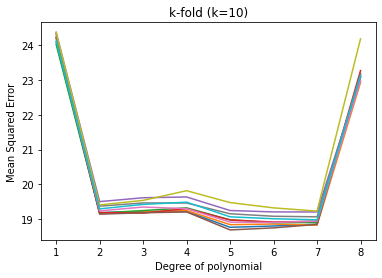

In [9]:
X = df[['horsepower']].to_numpy()
y = df[['mpg']].to_numpy()
k = 10
for j in range(1,11):
  kf = KFold(n_splits=k,shuffle=True,random_state=j)
  MSEs = []
  for i in range(1,9):
    mse = 0
    for train_index, test_index in kf.split(X):
      X_train = X[train_index]
      y_train = y[train_index]
      X_test = X[test_index]
      y_test = y[test_index]  
      polynomial_features= PolynomialFeatures(degree=i)
      xp = polynomial_features.fit_transform(X_train)
      model = sm.OLS(y_train, xp)
      results = model.fit()
      xp_test = polynomial_features.fit_transform(X_test)
      y_pred = results.predict(xp_test)
      mse += mean_squared_error(y_test, y_pred)
    MSEs.append(mse/k)
  n = np.arange(1,i+1)
  plt.plot(n, MSEs)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error')
plt.title('k-fold (k=10)')

## Bias-Variance trade-off

จากวิธี k-fold จะมีข้อดีคือใช้การคำนวณที่น้อยกว่า LOOCV แต่ข้อดีอีกข้อคือ k-fold จะให้ค่าประมาณของ test error rate ที่แม่นยำกว่า LOOCV ซึ่งเป็นผลจาก bias-variance trade-off

ทั้งสามวิธีที่กล่าวมาจะพบว่า hold out จะใช้จำนวน training data ที่น้อยที่สุดจึงให้ bias ของ test error rate ที่สูงที่สุด ดังนั้นในมุมมองของ bias วิธี LOOCV จะให้ค่า bias น้อยที่สุดเนื่องจากใช้จำนวน training data สูงที่สุด อย่างไรก็ตาม bias ไม่ใช่ค่าเดียวที่ควรพิจารณา ควรพิจารณาถึงค่า varaince ด้วย ซึ่งมีหลักการอยู่ว่า เราไม่สามารถทำให้ทั้ง bias และ variance น้อยลงพร้อมกันได้ เมื่อเราทำให้ตัวใดตัวหนึ่งน้อยลงอีกตัวจะมีค่ามากขึ้น ดังนั้น bias ของ LOOCV น้อยที่สุด จะมีค่า variance สูงที่สุด โดยเมื่อพิจารณาจากการหาค่า test error rate ซึ่งก็คือการหาค่าเฉลี่ยของ MSE ที่คิดได้ในแต่ละรอบ โดย MSE นี้เองถูกคำนวณมาจากการ fit model ของ data ซึ่ง data ที่ใช้ fit model ในแต่ละครั้งจะมีความซ้ำกันมากสำหรับในกรณี LOOCV แสดงว่าค่า MSE จะมี correlation กันสูง ดังนั้น mean ของค่าที่มี correlation กันสูงก็จะทำให้ test error rate มีค่า variance สูง ในขณะที่วิธี k-fold จะได้ variancec ที่น้อยกว่าเนื่องจากใช้จำนวน data ที่ซ้ำกันน้อยกว่า 

ดังนั้น จาก bias-variance trade-off จะส่งผลเมื่อค่า k ใน k-fold เมื่อค่า k มาก bias จะต่ำแต่ variance จะสูง

varaince ในที่นี้คือ การเปลี่ยน dataset ในการ train ทำให้ model ให้ผลลัพธ์เปลี่ยนไปมาก ซึ่ง model ที่ดีไม่ว่า dataset (ชนิดเดียวกัน) จะเปลี่ยนไปอย่างไรควรให้ผลลัพธ์เท่าเดิม